# Plane wave expansion: dipole convolution
## Notebook 5/5/2021
### $e^{i\omega x} = \frac{1}{\pi}\sin(\pi\omega)\sum_{n=-\infty}^\infty\frac{(-1)^n}{\omega - n}e^{inx}$ for $\omega \notin \mathbb{Z}$
### This is a Fourier expansion on $[-\pi, \pi]$, as seen below

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sp

plt.style.use('dark_background')
%matplotlib inline

In [48]:
# Series exp(i * omega * x) ~ sinc(x) * series(exp(i * n * x) / (o - n))
# range(1-n, n) is shortcut, e.g. range(1-3, 3) = -2, -1, 0, 1, 2
def series(n, o, x):
    return sp.sinc(o) * np.array([(-1) ** s * np.exp(1j*s*x) * o / (o - s) for s in range(1-n, n)]).sum(axis=0)

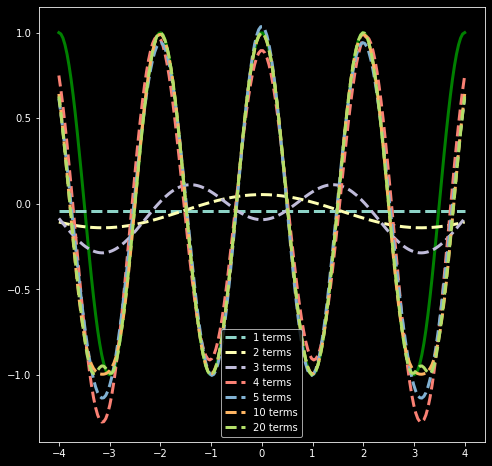

In [51]:
# Expand exp(i * pi * x)
o = np.pi
x = np.linspace(-4, 4, num=200)
y = np.exp(1j * o * x)

# partial sums
sums = [1, 2, 3, 4, 5, 10, 20]
yf = np.array([series(i, o, x) for i in sums])

# examine
plt.close('all')
plt.figure(figsize=(8,8))
plt.plot(x, np.real(y), 'g', linewidth=3)
for idx, val in enumerate(sums):
    plt.plot(x, np.real(yf[idx, :]), '--', linewidth=3, label='%i terms'%(val))
plt.legend(loc='best')
plt.show()

## Conclusion: For real omega, convergence is non-uniform and jumps considerably for the term n~omega
### Convergence only in $x\in[-\pi, \pi]$

# Complex omega

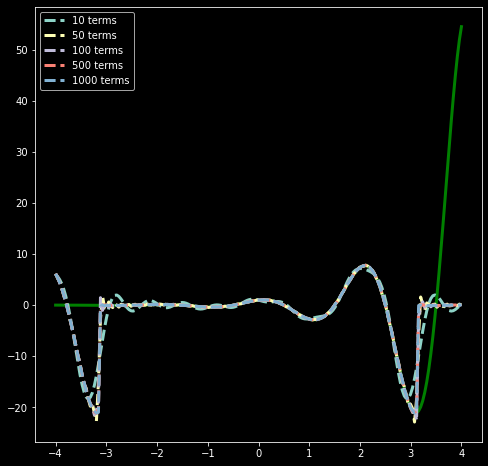

In [54]:
# Expand exp(i * pi * x)
x = np.linspace(-4, 4, num=200)
o = -1j + np.pi
y = np.exp(1j * o * x)

# partial sums
sums = [10, 50, 100, 500, 1000]
yf = np.array([series(i, o, x) for i in sums])

# examine
plt.close('all')
plt.figure(figsize=(8,8))
plt.plot(x, np.real(y), 'g', linewidth=3)
for idx, val in enumerate(sums):
    plt.plot(x, np.real(yf[idx, :]), '--', linewidth=3, label='%i terms'%(val))
plt.legend(loc='best')
plt.show()

### Same conclusion, convergence for $x \in [-\pi, \pi]$

### For $\omega \to n\in\mathbb{Z}$, $\lim_{\omega\to n}\frac{1}{\pi}\frac{\sin(\pi\omega)}{\omega - n}\to 1$ so series does hold even for $\omega$ integer.

### In particular, using $\frac{\omega}{\omega - n} = 1 + \frac{n}{\omega - n}$ we have the following Fourier expansion:
$\sum_{n=-\infty}^\infty \frac{n}{\omega - n}e^{in(x-\pi)} = \frac{e^{i\omega x}}{\text{sinc}(\omega)} - 2\pi\delta(x-\pi)$

### Now consider

$\displaystyle \sum_{n=-\infty}^\infty \frac{e^{-in\theta}}{\omega - n} = \frac{\pi}{\sin(\pi\omega)}e^{-i\omega(\theta - \pi)}$ ?

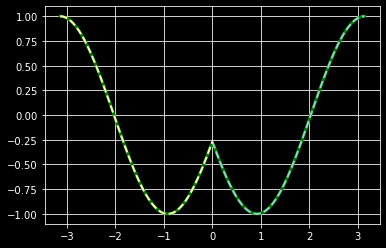

In [13]:
theta = np.linspace(-np.pi, np.pi, num=100)

om = np.sqrt(2.0)

terms = 100
series = np.array([np.exp(-1j * n * theta) / (om - n)
                   for n in range(1-terms, terms)]).sum(axis=0) * np.sin(np.pi*om) / np.pi

t2 = np.linspace(0, np.pi, num=100)
t3 = np.linspace(-np.pi, 0, num=100)
plt.figure()
plt.plot(theta, np.real(series), 'g', linewidth=3)
plt.plot(t2, np.cos(om * (t2 - np.pi) ), '--', linewidth=2)
plt.plot(t3, np.cos(om * (t3 + np.pi) ), '--', linewidth=2)
plt.grid(True)
plt.show()

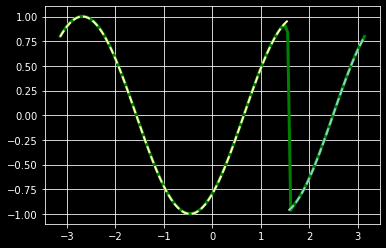

In [28]:
terms = 100
series = np.array([np.exp(-1j * n * theta) * (1j)**n / (om - n)
                   for n in range(1-terms, terms)]).sum(axis=0) * np.sin(np.pi*om) / np.pi

t2 = np.linspace(np.pi/2.0, np.pi, num=100)
t3 = np.linspace(-np.pi, np.pi/2.0, num=100)

plt.close('all')
plt.figure()
plt.plot(theta, np.imag(series), 'g', linewidth=3)
plt.plot(t2, -np.sin(om * (t2 - np.pi - np.pi/2.0) ), '--', linewidth=2)
plt.plot(t3, -np.sin(om * (t3 + np.pi/2.0) ), '--', linewidth=2)
plt.grid(True)
plt.show()